<a href="https://colab.research.google.com/github/LilySaya/Fundamentals_of_AI/blob/main/LinearRegression_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import statistics as st

GPT of X who has GPA of 2.8 is 3.707650661468506


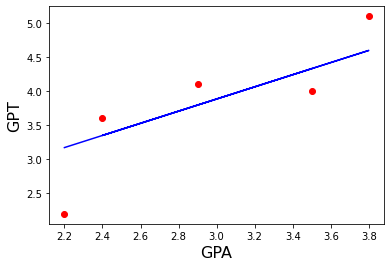

In [ ]:
#X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1,noise = 20, random_state = 10)
X_numpy  = np.array([3.5, 2.4, 3.8, 2.9, 2.2])
y_numpy  = np.array([4.0, 3.6, 5.1, 4.1, 2.2])

#change from numpy to tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
X_test = torch.tensor([2.8], dtype = torch.float32)

#change tensor size
X = X.view(-1,1)
y = y.view(-1,1)

#define size
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

#model
model = nn.Linear(input_size, output_size)

#loss function
criterion = nn.MSELoss()

#optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#train data
n_epochs = 100
for epoch in range(n_epochs):
  #forward
  y_pred = model(X)

  #loss
  loss = criterion(y, y_pred)

  #backward
  loss.backward()

  #update parameters
  optimizer.step()

  #clear gradient
  optimizer.zero_grad()

  if ((epoch+1)%10 == 0):
    [w,b] = model.parameters()
    #print(f'epoch {epoch+1}: loss {loss.item()}, weights {w[0][0].item()}')

#plot
fig, ax = plt.subplots()
y_predicted = model(X).detach().numpy()
ax.plot(X_numpy, y_numpy, 'ro')
ax.plot(X, y_predicted, 'b')

#set labels
ax.set_xlabel("GPA", fontsize=16)
ax.set_ylabel("GPT", fontsize=16)


print(f'GPT of X who has GPA of 2.8 is {model(X_test).detach().numpy().item()}')

[3.5 2.4 3.8 2.9 2.2]
[4.51638478 3.05708245 4.91437632 3.72040169 2.79175476]
GPT of X who has GPA of 2.8 is 3.587737843551797
-0.12684989429175042 1.326638477801267


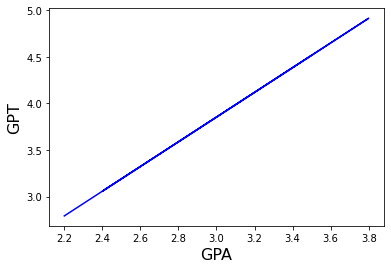

In [ ]:
X = np.array([3.5, 2.4, 3.8, 2.9, 2.2])
y  = np.array([4.0, 3.6, 5.1, 4.1, 2.2])
X_test = 2.8
#Find weight manually
w1 = (st.mean(X*y)- (st.mean(X)*st.mean(y))) / (st.mean(X*X)- (st.mean(X)*st.mean(X)))
w0 = st.mean(y) - w1*st.mean(X)

#plot
fig, ax = plt.subplots()
#ax.scatter(X, y, c = "r")
ax.plot(X, w0 + w1*X, 'b')
print(X)
print(w0 + w1*X)
#Set labels
ax.set_xlabel("GPA", fontsize=16)
ax.set_ylabel("GPT", fontsize=16)


print(f'GPT of X who has GPA of 2.8 is {w0+w1*X_test}')
print(w0, w1)

GPT of X who has GPA of 2.8 is 3.5877378435518095


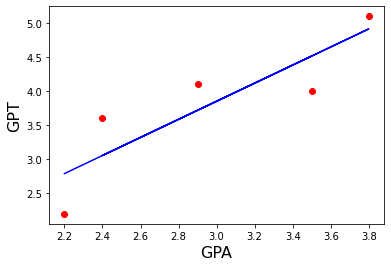

In [ ]:
X  = np.array([3.5, 2.4, 3.8, 2.9, 2.2])
y  = np.array([4.0, 3.6, 5.1, 4.1, 2.2])
X_test = 2.8
one = np.ones((5,1))
Q = np.array([[X.T@X, (X.T@one).item()],[(one.T@X).item(), (one.T@one).item()]])
p = np.array([[-y.T@X],[(-y.T@one).item()]])
w = -np.linalg.inv(Q)@p

#plot
fig, ax = plt.subplots()
ax.scatter(X, y, c = "r")
ax.plot(X, w[1] + w[0]*X, 'b')

#Set labels
ax.set_xlabel("GPA", fontsize=16)
ax.set_ylabel("GPT", fontsize=16)


print(f'GPT of X who has GPA of 2.8 is {(w[1]+w[0]*X_test).item()}')

In [ ]:
#Matlab
